In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Path to your dataset
path = '/content/drive/MyDrive/Netflix_User_Analysis/data/netflix_titles.csv'

# Load the dataset
df = pd.read_csv(path)

# Preview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Basic structure
df.shape          # Rows and columns
df.columns        # Column names
df.info()         # Data types and non-null counts

# Check missing values
df.isnull().sum()

# View first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
# Clean the column by stripping leading/trailing spaces
df['date_added'] = df['date_added'].astype(str).str.strip()

# Now safely convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

/tmp/ipython-input-4273987103.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


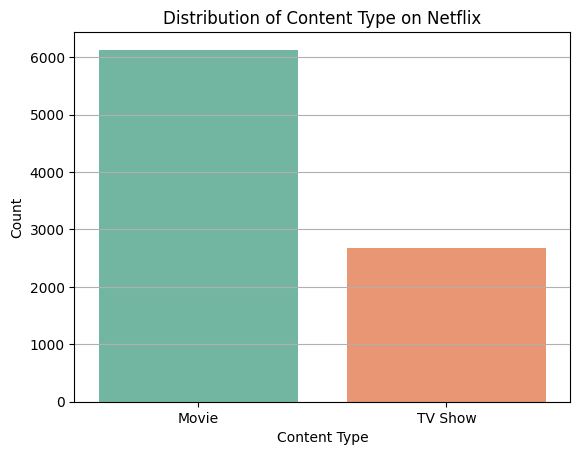

In [21]:
import os

# Create folder structure if it doesn't exist
save_path = '/content/drive/MyDrive/Netflix_User_Analysis/outputs/graphs'
os.makedirs(save_path, exist_ok=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.grid(axis='y')
# Save BEFORE show
plt.savefig('/content/drive/MyDrive/Netflix_User_Analysis/outputs/graphs/content_by_type.png')
plt.show()


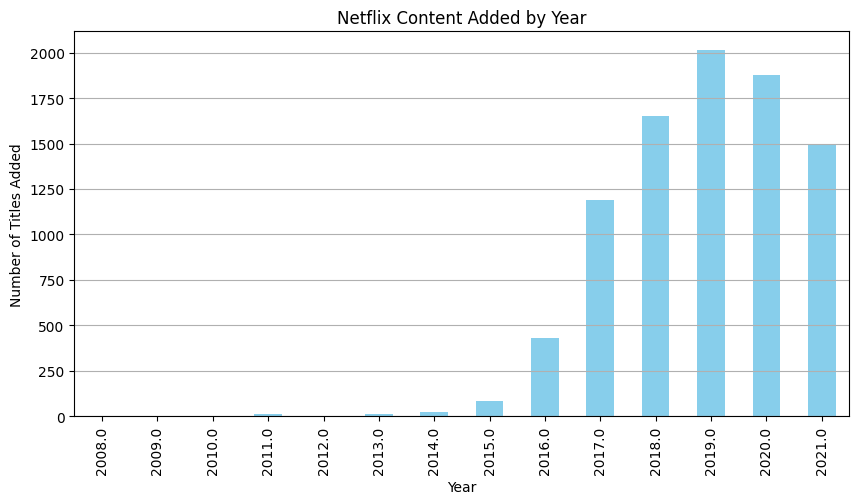

In [19]:
df['year_added'].value_counts().sort_index().plot(
    kind='bar', figsize=(10, 5), color='skyblue'
)
plt.title('Netflix Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(axis='y')
plt.savefig('/content/drive/MyDrive/Netflix_User_Analysis/outputs/graphs/content_by_year.png')
plt.show()


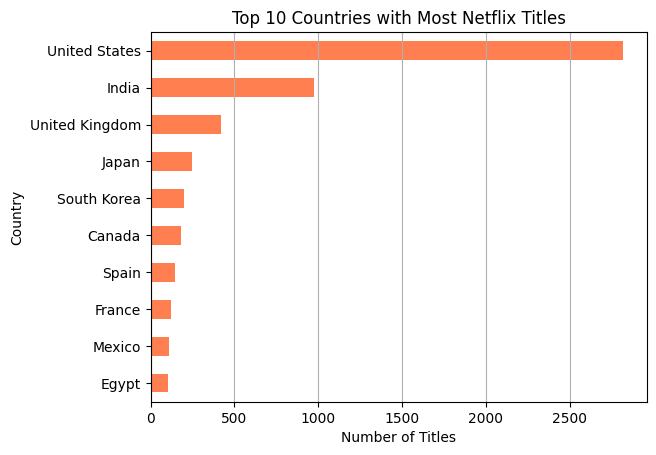

In [22]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='barh', color='coral')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Most on top
plt.grid(axis='x')
# Save before showing
plt.savefig('/content/drive/MyDrive/Netflix_User_Analysis/outputs/graphs/top_countries.png')
plt.show()


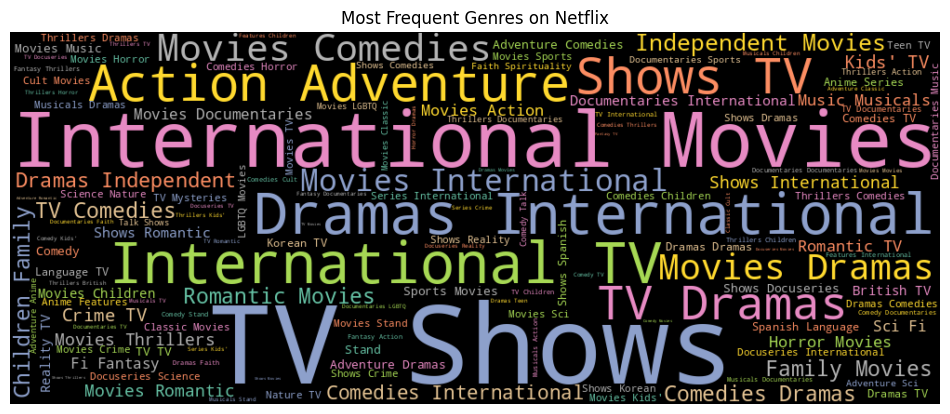

In [25]:
from wordcloud import WordCloud

# Combine all genres into one string
genre_text = ','.join(df['listed_in'].dropna())

wordcloud = WordCloud(width=1000, height=400, background_color='black', colormap='Set2').generate(genre_text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Genres on Netflix')
plt.savefig('/content/drive/MyDrive/Netflix_User_Analysis/outputs/graphs/genre_wordcloud.png')
plt.show()
